# Fashion MNIST - Kaggle Kings - try 1

In [133]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential, Model
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.layers import Input, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D, Convolution2D
from keras.layers.convolutional import MaxPooling2D, ZeroPadding2D
# from keras.layers.advanced_activations import LeakyReLU, PReLU
# from keras import regularizers
# from keras.callbacks import CSVLogger

# from keras import layers
# from keras import models
from keras.utils import to_categorical

import itertools
from sklearn.metrics import confusion_matrix

import mnist_reader

## Read dataset and split to train and test set

In [61]:
X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')
print('Train shape: ', X_train.shape , y_train.shape)
print('Test shape:  ', X_test.shape, y_test.shape)

labels = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
    }

Train shape:  (60000, 784) (60000,)
Test shape:   (10000, 784) (10000,)


## Lets take a look at the data

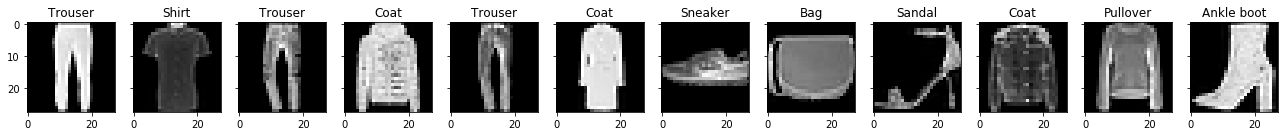

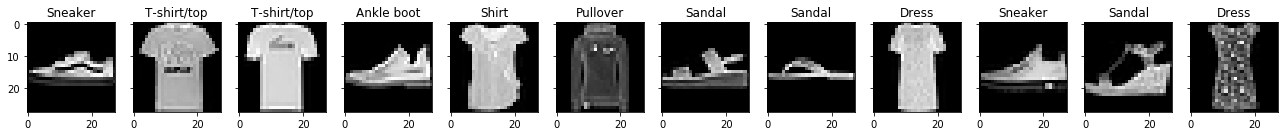

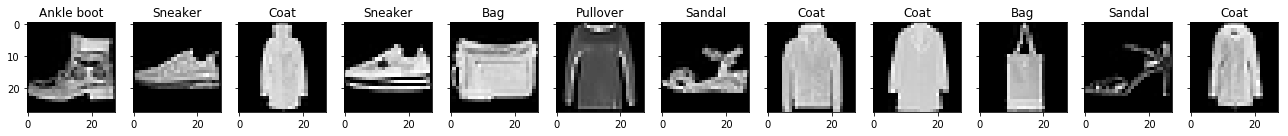

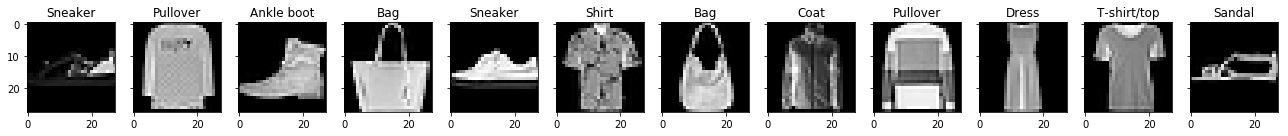

In [62]:
for i in range(4):
    fig, axs = plt.subplots(1,12, figsize=(18,2), sharex=False, sharey=True)
    for ax in axs:
        rnd_ind = np.random.choice(y_train.shape[0])
        tmp_im = X_train[rnd_ind,:].reshape(28,-1)
        ax.imshow(tmp_im,cmap='gray', aspect='equal');
        ax.set_title(labels[y_train[rnd_ind]])
    fig.tight_layout()

### Notes:
* Sandles and boots look alike
* Dress and Pullover look alike
* looks like all images are facing same direction. maybe we should try data augmentation

## Lets build a simple neural net model

In [157]:
model = models.Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_10 (Batc (None, 26, 26, 32)        128       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
batch_normalization_11 (Batc (None, 11, 11, 64)        256       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 3, 3, 64)          36928     
__________

## Train the model and evaluate:

In [158]:
train_images = X_train.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = X_test.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
hist = model.fit(train_images, train_labels, epochs=5, batch_size=128, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 196s - loss: 0.5173 - acc: 0.8243 - val_loss: 0.9566 - val_acc: 0.6608
Epoch 2/5
48000/48000 [==============================] - 193s - loss: 0.3226 - acc: 0.8862 - val_loss: 0.2845 - val_acc: 0.8972
Epoch 3/5
48000/48000 [==============================] - 194s - loss: 0.2713 - acc: 0.9030 - val_loss: 0.3104 - val_acc: 0.8800
Epoch 4/5
48000/48000 [==============================] - 197s - loss: 0.2421 - acc: 0.9137 - val_loss: 0.3002 - val_acc: 0.8915
Epoch 5/5
48000/48000 [==============================] - 195s - loss: 0.2171 - acc: 0.9219 - val_loss: 0.2575 - val_acc: 0.9062


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


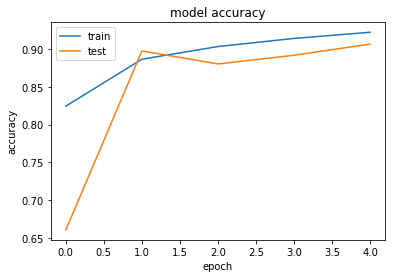

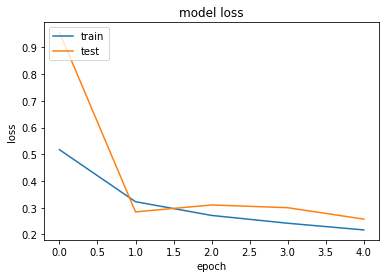

In [162]:
history = hist
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

## Test the model on our test set
First, lets see the accuracy

In [160]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('\ntest accuracy:', test_acc)
y_pred = model.predict(test_images, batch_size=64)
y_pred_classes = model.predict_classes(test_images, batch_size=64)

 9984/10000 [============================>.] - ETA: 0s
test accuracy: 0.9027


predict:

y_pred = model.predict(test_images, batch_size=64)
y_pred_classes = model.predict_classes(test_images, batch_size=64)

 9984/10000 [============================>.] - ETA: 0s

## Lets take a look at some wrong classifications

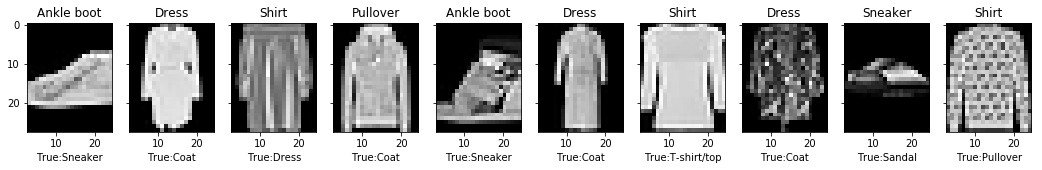

In [163]:
num_pics = 10
fig, axs = plt.subplots(1,num_pics, figsize=(18,2), sharex=False, sharey=True)
for i in range(num_pics):
    rnd_ind = np.random.choice(y_wrong.shape[0])
    ax = axs[i]
    tmp_im = X_wrong[rnd_ind,:].reshape(28,-1)
    ax.imshow(tmp_im,cmap='gray', aspect='equal');
    ax.set_title(labels[y_wrong[rnd_ind]])
    ax.set_xlabel('True:' + labels[y_true[rnd_ind]])

What to say?? coat is bad..

## Confusion matrix for all classes

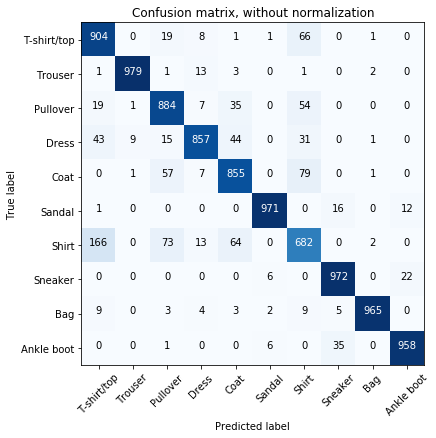

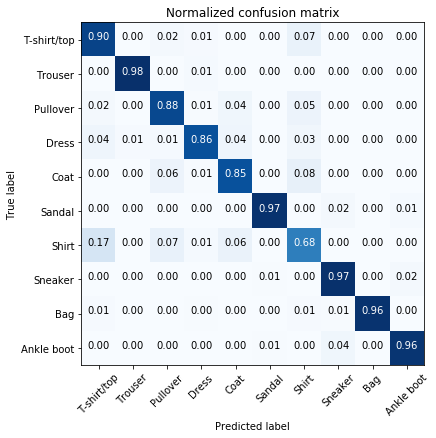

In [165]:
class_names = labels.values()

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#         print("Normalized confusion matrix")
    else:
#         print('Confusion matrix, without normalization')
        pass
#     print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
#     plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_classes)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(6,6))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure(figsize=(6,6))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')


## Lets split to 3 different classes - shoe class, dhirts class, and bags class

In [166]:
print('Train shape: ', X_train.shape , y_train.shape)
print('Test shape:  ', X_test.shape, y_test.shape)

Train shape:  (60000, 784) (60000,)
Test shape:   (10000, 784) (10000,)


In [183]:
map_labels = {
    0: 0,
    1: 1,
    2: 0,
    3: 0,
    4: 0,
    5: 2,
    6: 0,
    7: 3,
    8: 4,
    9: 5
    }

meta_labels = {
    0: 'Shirts Family',
    1: 'Trouser',
    2: 'Sandal',
    3: 'Sneaker',
    4: 'Bag',
    5: 'Ankle boot'
    }

meta_y_train = np.asarray([map_labels[cls] for cls in y_train])
meta_y_test = np.asarray([map_labels[cls] for cls in y_test])

In [188]:
meta_model = models.Sequential()
meta_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
meta_model.add(BatchNormalization())
meta_model.add(MaxPooling2D((2, 2)))
meta_model.add(Conv2D(64, (3, 3), activation='relu'))
meta_model.add(BatchNormalization())
meta_model.add(MaxPooling2D((2, 2)))
meta_model.add(Conv2D(64, (3, 3), activation='relu'))
meta_model.add(BatchNormalization())
meta_model.add(Flatten())
meta_model.add(Dense(64, activation='relu'))
meta_model.add(Dropout(0.3))
meta_model.add(BatchNormalization())
meta_model.add(Dense(6, activation='softmax'))

In [189]:
train_images = X_train.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = X_test.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(meta_y_train)
test_labels = to_categorical(meta_y_test)


meta_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
meta_hist = meta_model.fit(train_images, train_labels, epochs=3, batch_size=128, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/3
48000/48000 [==============================] - 187s - loss: 0.1618 - acc: 0.9526 - val_loss: 0.4266 - val_acc: 0.8890
Epoch 2/3
48000/48000 [==============================] - 196s - loss: 0.0712 - acc: 0.9790 - val_loss: 0.0661 - val_acc: 0.9796
Epoch 3/3
48000/48000 [==============================] - 190s - loss: 0.0521 - acc: 0.9839 - val_loss: 0.0826 - val_acc: 0.9735


In [191]:
test_loss, test_acc = meta_model.evaluate(test_images, test_labels)
print('\ntest accuracy:', test_acc)
y_pred = meta_model.predict(test_images, batch_size=64)
y_pred_classes = meta_model.predict_classes(test_images, batch_size=64)

 9984/10000 [============================>.] - ETA: 0s
test accuracy: 0.9713
 9984/10000 [============================>.] - ETA: 0s

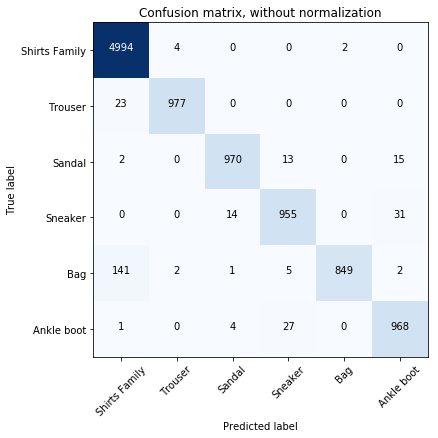

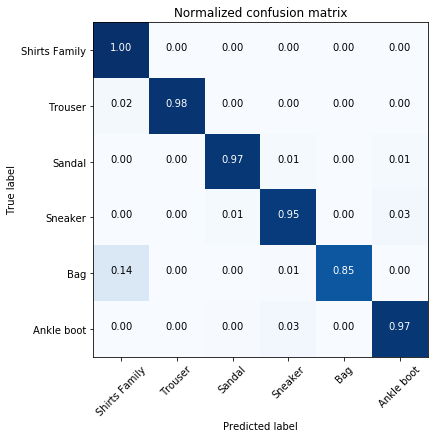

In [193]:
class_names = meta_labels.values()


# Compute confusion matrix
cnf_matrix = confusion_matrix(meta_y_test, y_pred_classes)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(6,6))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure(figsize=(6,6))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

In [218]:
shirts_X_train = X_train[meta_y_train==0]
shirts_y_train = y_train[meta_y_train==0]

shirts_X_test = X_test[y_pred_classes==0]
shirts_y_test = y_test[y_pred_classes==0]

In [221]:
y_pred_classes

array([5, 0, 1, ..., 4, 1, 2], dtype=int64)

In [215]:
shirts_model = models.Sequential()
shirts_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
shirts_model.add(BatchNormalization())
shirts_model.add(MaxPooling2D((2, 2)))
shirts_model.add(Conv2D(64, (3, 3), activation='relu'))
shirts_model.add(BatchNormalization())
shirts_model.add(MaxPooling2D((2, 2)))
shirts_model.add(Conv2D(64, (3, 3), activation='relu'))
shirts_model.add(BatchNormalization())
shirts_model.add(Flatten())
shirts_model.add(Dense(64, activation='relu'))
shirts_model.add(Dropout(0.3))
shirts_model.add(BatchNormalization())
shirts_model.add(Dense(5, activation='softmax'))
shirts_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_38 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_38 (Batc (None, 26, 26, 32)        128       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
batch_normalization_39 (Batc (None, 11, 11, 64)        256       
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 3, 3, 64)          36928     
__________

In [216]:
np.unique(shirts_y_test)

array([0, 1, 2, 3, 4, 5, 6, 8, 9], dtype=uint8)

In [217]:
train_images = shirts_X_train.reshape((shirts_X_train.shape[0], 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = shirts_X_test.reshape((shirts_X_test.shape[0], 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(shirts_y_train)
test_labels = to_categorical(shirts_y_test)


shirts_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
meta_hist = shirts_model.fit(train_images, train_labels, epochs=3, batch_size=128, validation_split=0.2)

ValueError: Error when checking target: expected dense_26 to have shape (None, 5) but got array with shape (30000, 7)